<a href="https://colab.research.google.com/github/Neha9492/Traffic-incident-Analysis-in-Dubai/blob/main/MyProject_Traffic_IncidentAnalysisWIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Traffic Incident Analysis

* Import Libraries
*Load Data
*Exploratory Data Analysis
*Features Engineering



**GOAL**:
* Which days have maximum occurences of traffic incidents? are they weekday or weekend? Identify high and low risk days.
* Which time of the days have maximum occurrence of traffic incidents? Identify high and low risk times.
* which coordinates have maximum occurence of traffic incidents? Identify high and low risk areas.
* Identify any relation between areas and time-related aspects.
* Predict occurrences based on given parameters using CNN (probably)

###**Import Libraries and data**

In [ ]:
#Import Libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
df = pd.read_csv('./Traffic_Incidents.csv')

In [ ]:
df.head()

,acci_id,acci_time,acci_name,acci_x,acci_y
0,3821724881,30/06/2021 22:19:06,الصدم والهروب - بسيط,25.111720,55.195637
1,3821730367,30/06/2021 22:31:43,الصدم والهروب - بسيط,25.118068,55.200460
2,3821739217,30/06/2021 22:53:26,صدم عمود - بسيط,25.044103,55.232451
3,3821743835,30/06/2021 23:05:04,مركبه عطلانه في الشارع - بسيط,25.174457,55.332777
4,3821744141,30/06/2021 23:05:54,اصطدام بين مركبتين - بسيط,25.220452,55.273603


### **Data Cleaning and Pre-processing**


####Drop columns
#####Future scope- convert the arabic to english and assess

In [ ]:
#Drop the acci_name as it is in arabic
trDf=df.drop('acci_name',axis=1)
trDf.head()

,acci_id,acci_time,acci_x,acci_y
0,3821724881,30/06/2021 22:19:06,25.111720,55.195637
1,3821730367,30/06/2021 22:31:43,25.118068,55.200460
2,3821739217,30/06/2021 22:53:26,25.044103,55.232451
3,3821743835,30/06/2021 23:05:04,25.174457,55.332777
4,3821744141,30/06/2021 23:05:54,25.220452,55.273603


In [ ]:
trDf=trDf.drop('acci_id',axis=1)
trDf.head()


,acci_time,acci_x,acci_y
0,30/06/2021 22:19:06,25.111720,55.195637
1,30/06/2021 22:31:43,25.118068,55.200460
2,30/06/2021 22:53:26,25.044103,55.232451
3,30/06/2021 23:05:04,25.174457,55.332777
4,30/06/2021 23:05:54,25.220452,55.273603


####Looking for null values to drop, if any

In [ ]:
trDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49587 entries, 0 to 49586
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   acci_time  49587 non-null  object 
 1   acci_x     49587 non-null  float64
 2   acci_y     49587 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
trDf.isna().sum(axis = 0)

acci_time    0
acci_x       0
acci_y       0
dtype: int64

In [ ]:
trDf.shape

(49587, 3)

In [ ]:
trDf = trDf[trDf.acci_x != 0]
trDf.shape

(49075, 3)

In [ ]:
trDf = trDf[trDf.acci_y != 0]
trDf.shape

(49075, 3)

#### Converting columns 

#####Accident Date and time ====>> Date,time,month,year

In [ ]:
#divide acc date time into date, time, month, year
trDf['acci_time']=pd.to_datetime(df.acci_time)
trDf['acc_date'] = trDf['acci_time'].dt.date
trDf['acc_time'] = trDf['acci_time'].dt.time
trDf['acc_month'] = trDf['acci_time'].dt.month
trDf['acc_year'] = trDf['acci_time'].dt.year
trDf=trDf.drop('acci_time',axis=1)
trDf.head()


,acci_x,acci_y,acc_date,acc_time,acc_month,acc_year
0,25.111720,55.195637,2021-06-30,22:19:06,6,2021
1,25.118068,55.200460,2021-06-30,22:31:43,6,2021
2,25.044103,55.232451,2021-06-30,22:53:26,6,2021
3,25.174457,55.332777,2021-06-30,23:05:04,6,2021
4,25.220452,55.273603,2021-06-30,23:05:54,6,2021


#####not known now

In [ ]:
trDf.groupby('acc_date').size()
trdateDf = trDf.groupby('acc_date')
trdateDf.head()
#trdateDf.describe()

,acci_x,acci_y,acc_date,acc_time,acc_month,acc_year
0,25.111720,55.195637,2021-06-30,22:19:06,6,2021
1,25.118068,55.200460,2021-06-30,22:31:43,6,2021
2,25.044103,55.232451,2021-06-30,22:53:26,6,2021
3,25.174457,55.332777,2021-06-30,23:05:04,6,2021
4,25.220452,55.273603,2021-06-30,23:05:54,6,2021
...,...,...,...,...,...,...
49365,25.156046,55.407818,2019-08-17,22:06:22,8,2019
49366,25.103505,55.149281,2019-08-17,23:52:48,8,2019
49367,25.073560,55.130306,2019-08-17,22:53:32,8,2019
49368,25.272096,55.371079,2019-08-17,22:54:00,8,2019


#####Convert date to weekdays

In [ ]:
trDf['weekdayum']=pd.to_datetime(trDf['acc_date']).dt.day_name()
trDf.head()

,acci_x,acci_y,acc_date,acc_time,acc_month,acc_year,weekdayum
0,25.111720,55.195637,2021-06-30,22:19:06,6,2021,Wednesday
1,25.118068,55.200460,2021-06-30,22:31:43,6,2021,Wednesday
2,25.044103,55.232451,2021-06-30,22:53:26,6,2021,Wednesday
3,25.174457,55.332777,2021-06-30,23:05:04,6,2021,Wednesday
4,25.220452,55.273603,2021-06-30,23:05:54,6,2021,Wednesday


#####Identify Weekends and weekdays

In [ ]:
#trDf['month'] = trDf ['acc_date'].apply(lambda time: time.month)
#trDf['day'] = trDf ['acc_date'].apply(lambda time: time.day)
#trDf['year'] = trDf ['acc_date'].apply(lambda time: time.year)
#trDf['acc_date'] = pd.to_datetime(df['acc_date'])
#creating a weekend feature that includes Friday-Sunday
trDf['weekend']= np.where(trDf['weekdayum'].isin(['Thursday', 'Friday', 'Saturday']), 1, 0)
#trDf['weekday'] = calendar.weekday(trDf['year'],trDf['month'],trDf['day'])
#trDf['weekday']=datetime.date(trDf['year'],trDf['month'],trDf['day']).weekday()
trDf.head()

,acci_x,acci_y,acc_date,acc_time,acc_month,acc_year,weekdayum,weekend
0,25.111720,55.195637,2021-06-30,22:19:06,6,2021,Wednesday,0
1,25.118068,55.200460,2021-06-30,22:31:43,6,2021,Wednesday,0
2,25.044103,55.232451,2021-06-30,22:53:26,6,2021,Wednesday,0
3,25.174457,55.332777,2021-06-30,23:05:04,6,2021,Wednesday,0
4,25.220452,55.273603,2021-06-30,23:05:54,6,2021,Wednesday,0


##### Create time zones based on functional purpose

In [ ]:
#create time of day feature with Morning Rush, Day, Noon Rush, Afternoon, After Work Rush, Night

#time of day dictionary
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

#pull time data and create hour column
trDf['hour'] = trDf['acc_time'].astype(str)
trDf['hour'] = trDf['hour'].str[0:2]
#convert to numeric    
trDf['hour'] =  pd.to_numeric(trDf['hour'])

#convert to integer
trDf['hour'] = trDf['hour'].astype('int')

In [ ]:
#create time_of_day grouping

def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"

In [ ]:
#apply function   
#time of day function
trDf['time_of_day']= trDf['hour'].apply(daygroup)

In [ ]:
trDf.tail(20)

,acci_x,acci_y,acc_date,acc_time,acc_month,acc_year,weekdayum,weekend,hour,time_of_day
49567,25.223723,55.331150,2019-08-17,08:12:20,8,2019,Saturday,1,8,1
49568,25.235073,55.407852,2019-08-17,07:51:28,8,2019,Saturday,1,7,1
49569,25.225486,55.343796,2019-08-17,07:47:16,8,2019,Saturday,1,7,1
49570,25.269598,55.375430,2019-08-17,07:50:05,8,2019,Saturday,1,7,1
49571,25.273070,55.426079,2019-08-17,07:50:58,8,2019,Saturday,1,7,1
49572,25.253176,55.302335,2019-08-17,07:27:30,8,2019,Saturday,1,7,1
49573,25.181620,55.318482,2019-08-17,07:37:50,8,2019,Saturday,1,7,1
49574,25.259064,55.301416,2019-08-17,07:07:12,8,2019,Saturday,1,7,1
49575,25.076916,55.182026,2019-08-17,05:42:20,8,2019,Saturday,1,5,7
49576,24.957847,55.357822,2019-08-17,06:29:17,8,2019,Saturday,1,6,1


###**Exploratory Data Analysis - Time**

#####Analysis of incident counts by the day of the week and time of the days

In [ ]:
#define new dataframe with no of accidents in each time_of_day class
#columns: no of accidents, time_of_day, weekend, weekdayum
trDf.groupby('time_of_day').size()
trtimeDf = trDf.groupby('time_of_day')
#trtimeDf.drop(trtimeDf['risk_zone'])
#trtimeDf.head(5)
#trtimeDf.groupby('time_of_day').count()
trtimeDf.time_of_day.value_counts()

time_of_day  time_of_day
1            1               6153
2            2               4980
3            3               5994
4            4               6401
5            5               6069
6            6              10375
7            7               9103
Name: time_of_day, dtype: int64

Text(0.5, 1.0, 'Traffic incident numbers by time of day')

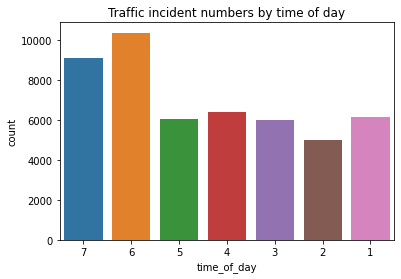

In [ ]:
plt.figure()
fig = sns.countplot(x="time_of_day",data=trDf)
plt.title('Traffic incident numbers by time of day')

***The time between 1800-2200 (time zone 6) has maximum occurrence of incidents.*** 

#####Incidents by Weekend/Weekday

In [ ]:
trDf.weekend.value_counts()

0    29266
1    19809
Name: weekend, dtype: int64

Text(0.5, 1.0, 'Traffic incident numbers by day of the week')

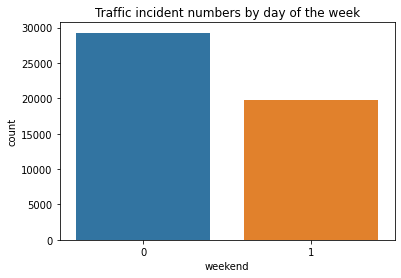

In [ ]:
plt.figure()
fig = sns.countplot(x="weekend",data=trDf)
plt.title('Traffic incident numbers by day of the week')

 ***Weekdays have more occurrence of incidents than weekends.***

Text(0.5, 1.0, 'Traffic incident numbers by day of the week and time zone')

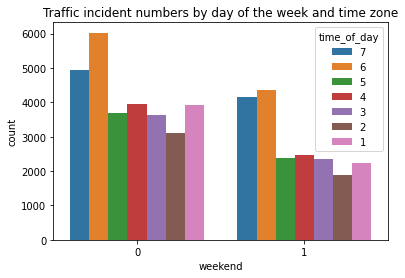

In [ ]:
plt.figure()
fig = sns.countplot(x="weekend",hue="time_of_day",data=trDf)
plt.title('Traffic incident numbers by day of the week and time zone')

Text(0.5, 1.0, 'Traffic incident numbers by time of day and time zone')

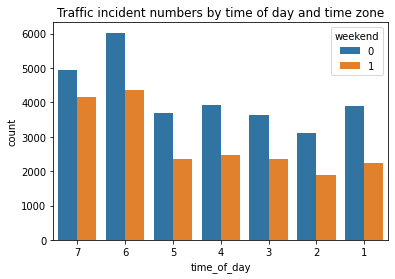

In [ ]:
plt.figure()
fig = sns.countplot(x="time_of_day",hue="weekend",data=trDf)
plt.title('Traffic incident numbers by time of day and time zone')

In [ ]:
trDf.weekdayum.value_counts(sort=False)

Thursday     7624
Wednesday    7312
Saturday     6822
Tuesday      6598
Friday       5363
Monday       7523
Sunday       7833
Name: weekdayum, dtype: int64

Text(0.5, 1.0, 'traffic incidents by days of the week ')

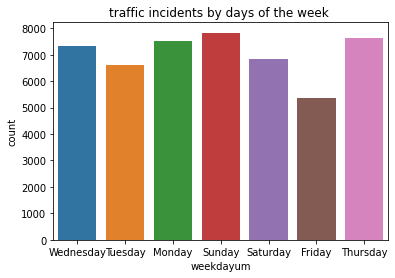

In [ ]:
plt.figure()
fig = sns.countplot(x="weekdayum",data=trDf)
plt.title('traffic incidents by days of the week ')

** **Clearly traffic incidents occur more on days as Sunday,Monday,Wednesday and Thursday, rather than Tuesday, Friday and Saturday**

Text(0.5, 1.0, 'traffic incidents by days of the week and timezone')

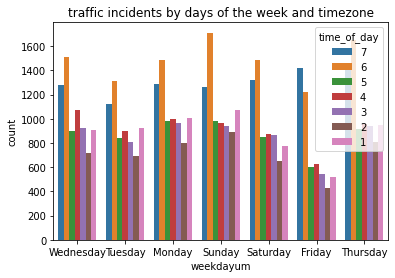

In [ ]:
plt.figure()
fig = sns.countplot(x="weekdayum",hue="time_of_day",data=trDf)
plt.title('traffic incidents by days of the week and timezone')

##### Cumulative analysis traffic incidents over years depending of weekday

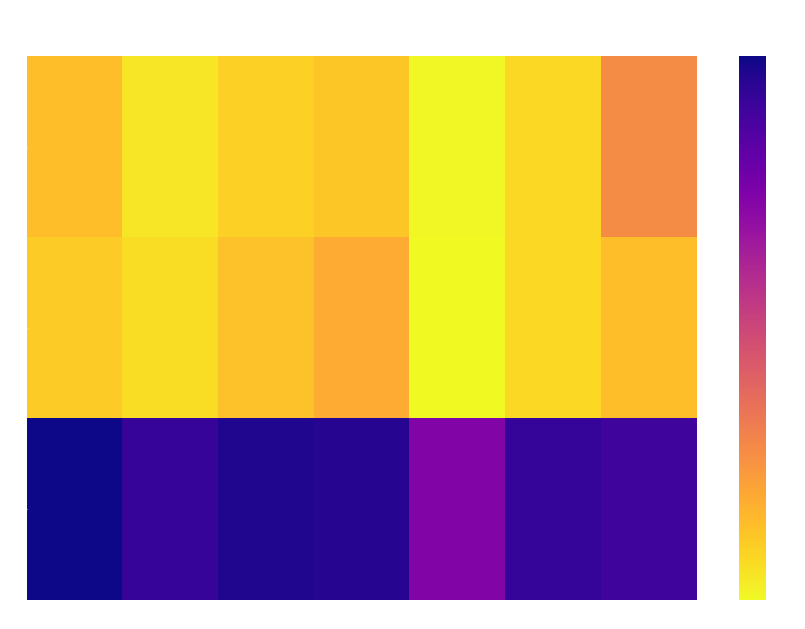

In [ ]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accweekday = trDf.groupby(['acc_year', 'weekdayum']).size()
accweekday = accweekday.rename_axis(['year', 'day_of_week'])\
                               .unstack('day_of_week')\
                               .reindex(columns=weekdays)

plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nAccidents by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('accidentsbyweekdayperyear.png')
plt.show()

**Over the years, the pattern of occurrences suggest the following: the least occurrences are on Fridays and Tuesdays; while the maximum occurrences have slightly varied between Sundays, Mondays and Thursdays.**

##### Analysis of incidents by Year and months

In [ ]:
trDf.acc_year.value_counts()

2021    32735
2019     8267
2020     8073
Name: acc_year, dtype: int64

Text(0.5, 1.0, 'traffic incidents by year')

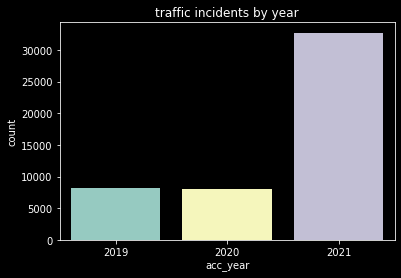

In [ ]:
plt.figure()
fig = sns.countplot(x="acc_year",data=trDf)
plt.title('traffic incidents by year')

It seems the data is more from 2021; the yearly occurences are not very conclusive therefore.

In [ ]:
trDf.acc_month.value_counts(sort=False)

1     4721
2     7260
3     2672
4     5058
5     6221
6     6362
7     1693
8     2026
9     3262
10    4176
11    2867
12    2757
Name: acc_month, dtype: int64

Text(0.5, 1.0, 'traffic incidents by month')

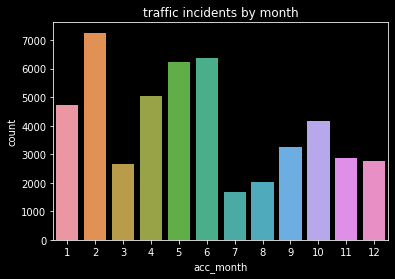

In [ ]:
plt.figure()
fig = sns.countplot(x="acc_month",data=trDf)
plt.title('traffic incidents by month')

Maximum occurence of incidents have been in the month of February; while months of May and June have been reported high occurrences than other months. The least occurrences have been in months of July, August.

In [ ]:
#define risk time zones
zone = {
    0: 'low risk',
    1:  'medium risk',
    2:  'high risk'
}

trDf.loc[:, 'risk_time_zone'] = trDf.loc[:, 'risk_time_zone'].apply(lambda val: zone[val])

KeyError: ignored

In [ ]:
trDf.head()

#### Clusterig on lattitude longitude

### **Exploratory Data Analysis - Spatial**

In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 32.7 MB/s 
     |████████████████████████████████| 6.6 MB 32.0 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [ ]:
import geopandas as gpd

In [ ]:
gpDf = trDf.copy()
gpDf.head()

,acci_x,acci_y,acc_date,acc_time,acc_month,acc_year,weekdayum,weekend,hour,time_of_day
0,25.111720,55.195637,2021-06-30,22:19:06,6,2021,Wednesday,0,22,7
1,25.118068,55.200460,2021-06-30,22:31:43,6,2021,Wednesday,0,22,7
2,25.044103,55.232451,2021-06-30,22:53:26,6,2021,Wednesday,0,22,7
3,25.174457,55.332777,2021-06-30,23:05:04,6,2021,Wednesday,0,23,7
4,25.220452,55.273603,2021-06-30,23:05:54,6,2021,Wednesday,0,23,7


In [ ]:
gpDf.dropna()

,acci_x,acci_y,acc_date,acc_time,acc_month,acc_year,weekdayum,weekend,hour,time_of_day
0,25.111720,55.195637,2021-06-30,22:19:06,6,2021,Wednesday,0,22,7
1,25.118068,55.200460,2021-06-30,22:31:43,6,2021,Wednesday,0,22,7
2,25.044103,55.232451,2021-06-30,22:53:26,6,2021,Wednesday,0,22,7
3,25.174457,55.332777,2021-06-30,23:05:04,6,2021,Wednesday,0,23,7
4,25.220452,55.273603,2021-06-30,23:05:54,6,2021,Wednesday,0,23,7
...,...,...,...,...,...,...,...,...,...,...
49582,25.162433,55.263582,2019-08-17,06:07:16,8,2019,Saturday,1,6,1
49583,25.274964,55.336231,2019-08-17,05:58:15,8,2019,Saturday,1,5,7
49584,25.283752,55.389113,2019-08-17,05:59:26,8,2019,Saturday,1,5,7
49585,25.015617,55.162178,2019-08-17,06:10:18,8,2019,Saturday,1,6,1


In [ ]:
gpDf.describe()

,acci_x,acci_y,acc_month,acc_year,weekend,hour
count,49075.000000,49075.000000,49075.000000,49075.000000,49075.000000,49075.000000
mean,25.151685,55.292940,5.717045,2020.498584,0.403647,13.546775
std,0.099279,0.114833,3.370987,0.766109,0.490633,5.937317
min,24.627782,54.919210,1.000000,2019.000000,0.000000,0.000000
25%,25.085214,55.215009,3.000000,2020.000000,0.000000,10.000000
50%,25.171922,55.289890,5.000000,2021.000000,0.000000,14.000000
75%,25.230787,55.374573,9.000000,2021.000000,1.000000,18.000000
max,26.492283,56.201550,12.000000,2021.000000,1.000000,23.000000


In [ ]:

xticks = np.arange(-0.15, -0.1, 0.002)
fig, ax = plt.subplots(figsize=(30,42))
ax.scatter(trDf.acci_y, trDf.acci_x, s=0.7, alpha=0.9, color='black')
#ax.set_xlim(24.0, 27.0)
ax.set_ylim(54.5, 56.55)
ax.set_xticks(xticks)
ax.set_yticks(np.arange(54.5, 56.55, 0.002))
ax.set_xticklabels(xticks.round(4), rotation=90)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='both', linestyle='-', linewidth='0.5', color='grey')

In [ ]:
import plotly.express as pxa
fig = px.density_mapbox(gpDf, lat='acci_x', lon='acci_y',  radius=10,
                        center=dict(lat=25.25, lon=55), zoom=10,
                        mapbox_style="open-street-map",width=1500,height=1500)
fig.show()

In [ ]:
from scipy.spatial import cKDTree
coords=gpDf[['acci_x','acci_y']]
coords.head()
tree=cKDTree(coords)

In [ ]:
print(tree)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
selectedFeatures = ['acci_x',	'acci_y']
features = gpDf.loc[:,selectedFeatures].values

In [ ]:
from sklearn.preprocessing import StandardScaler
features=StandardScaler().fit_transform(features)

Text(0, 0.5, 'long')

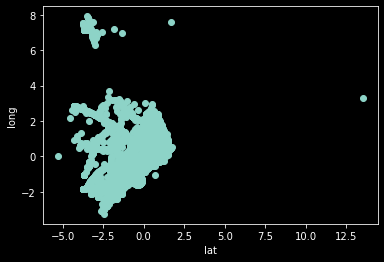

In [ ]:
features = pd.DataFrame(features, columns= selectedFeatures )
x = features['acci_x']
y = features['acci_y']
plt.scatter(x, y)


plt.xlabel('lat')
plt.ylabel('long')

In [ ]:
# In K-Means, n_clusters are the number of Centroids
kmeansModel = KMeans(n_clusters=5)

# Use .fit() to learn the parameters from the features only
kmeansModel.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# The labels are the clusters
labels = kmeansModel.labels_

centroids = kmeansModel.cluster_centers_

In [ ]:
# Again create a DataFrame from the matrix-features
featuresDf = pd.DataFrame(features, columns=['acci_x', 'acci_y'])
featuresDf.head(10)

,acci_x,acci_y
0,-0.402550,-0.847345
1,-0.338606,-0.805345
2,-1.083637,-0.526758
3,0.229384,0.346917
4,0.692678,-0.168394
5,-1.354428,0.970500
6,1.453465,0.721129
7,0.780049,-0.041627
8,-0.520697,-1.012278
9,-0.996064,-0.737102


Text(0, 0.5, 'longitude')

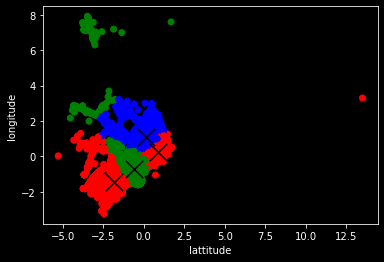

In [ ]:
# Create an array of color channels
colormap = np.array(['r', 'g', 'b','r','g'])

# Generate the scatter plot for the observations
plt.scatter(
    featuresDf['acci_x'], 
    featuresDf['acci_y'],
    c=colormap[labels]
  )

# Generate another scatter plot (superimposed) for the centroids
plt.scatter(
    centroids[:,0],
    centroids[:,1],
    s = 300,
    marker='x',
    c='k'
)

# Add labels for x-axis and y-axis
plt.xlabel('lattitude')
plt.ylabel('longitude')

AttributeError: ignored

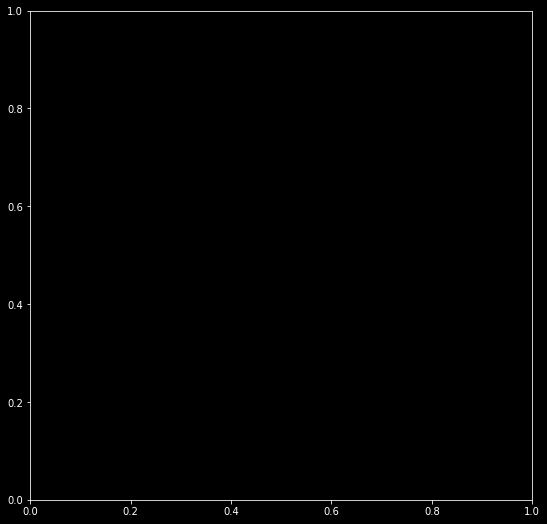

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))

gpDf.assign(cl=kmeansModel.labels_).plot(column='cl', categorical=True, legend=True,linewidth=0.1, edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()